# Description
In this notebook we show how to use pyMatchSeries in combination with Hyperspy to perform non-rigid-registration on image data as well as on spectroscopic data. The goal is to extract distortion effects from slow and fast scan noise and correct for them.

In [18]:
import hyperspy.api as hs
import os

## 1. Import the data, download if not already on system
We first set the file path and download the data if necessary. We then load in the data with hyperspy. Datasets can be both supplied as lazy (loaded from disk when needed) or non-lazy (in memory)

In [19]:
file_path = "./data/sample_data.emd"

if not os.path.isfile(file_path):
    import wget
    print("File not found on system, downloading... please be patient")
    url = "https://owncloud.gwdg.de/index.php/s/hb7QFFl2EswRpZA/download"
    folder, filename = os.path.split(file_path)
    if not os.path.isdir(folder):
        os.makedirs(folder)
    wget.download(url, file_path)
    print("Finished downloading file")

In [33]:
data = hs.load(file_path, sum_frames=False, lazy=True, load_SI_image_stack=True)
data

[<LazyEDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <LazySignal2D, title: Hf, dimensions: (|512, 512)>,
 <LazySignal2D, title: DF4, dimensions: (163|512, 512)>,
 <LazySignal2D, title: Ta, dimensions: (|512, 512)>,
 <LazySignal2D, title: Zr, dimensions: (|512, 512)>,
 <LazySignal2D, title: HAADF, dimensions: (163|512, 512)>,
 <LazySignal2D, title: Ti, dimensions: (|512, 512)>,
 <LazyEDSTEMSpectrum, title: EDS, dimensions: (512, 512, 163|4096)>]

## 2. Set up non-rigid registration calculation
All the relevant user functionality is contained in the MatchSeries object. To instantiate a calculation you just have to supply a dataset. This can be either a hyperspy Signal2D object but also a 3D numpy array or Dask array.

In [36]:
from pymatchseries import MatchSeries

In [5]:
calculation = MatchSeries(data[5])

Reasonable defaults have been assumed for the calculation, but you can change all of them under the `configuration` attribute. To check the valid parameters and their meaning, please check the original [match-series example parameter file](https://github.com/berkels/match-series/blob/master/examples/example_parameters.param) repository.

In [6]:
calculation.configuration

{'templateNamePattern': 'input/frame_%03d.tiff',
 'templateNumOffset': 0,
 'templateNumStep': 1,
 'numTemplates': 163,
 'templateSkipNums': [],
 'preSmoothSigma': 0,
 'dontNormalizeInputImages': 0,
 'enhanceContrastSaturationPercentage': 0.15,
 'normalizeMinToZero': 1,
 'useCorrelationToInitTranslation': 0,
 'maxCorrShift': 0,
 'maxGDIterations': 500,
 'stopEpsilon': 1e-06,
 'lambda': 200,
 'lambdaFactor': 1,
 'startLevel': 7,
 'stopLevel': 9,
 'precisionLevel': 9,
 'refineStartLevel': 8,
 'refineStopLevel': 9,
 'checkboxWidth': 8,
 'resizeInput': 0,
 'numExtraStages': 2,
 'extraStagesLambdaFactor': 0.1,
 'resampleInsteadOfProlongateDeformation': 1,
 'dontAccumulateDeformation': 0,
 'useMedianAsNewTarget': 1,
 'skipStage1': 0,
 'reuseStage1Results': 1,
 'reduceDeformations': 1,
 'saveDirectory': 'output/',
 'calcInverseDeformation': 0,
 'onlySaveDisplacement': 1,
 'saveNamedDeformedTemplates': 0,
 'saveNamedDeformedTemplatesUsingNearestNeighborInterpolation': 0,
 'saveNamedDeformedTemp

In [10]:
calculation.configuration["lambda"]=20
calculation.configuration["numTemplates"]=50

## 3. Running the calculation
Once we are happy with the configuration, we run the calculation with the `run` method (warning, this can take a few hours). Note that this will automatically create a directory at the location `path` with the necessary files and the output of the calculation. The MatchSeries object acts as an interface with this directory to make everything as easy as possible.

Note that the following cells will only work when the `matchSeries` binary is on your $PATH. You can compile it from source or install with conda from the conda-forge channel.

In [12]:
calculation.path

'/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/sample_data_HAADF'

In [13]:
calculation.run()

Directory output/ already exists
reading reference image from: input/frame_000.tiff
reading template image from: input/frame_000.tiff
Created directory output/stage1/
Using templates images ---------------------------------------
input/frame_001.tiff
input/frame_002.tiff
input/frame_003.tiff
input/frame_004.tiff
input/frame_005.tiff
input/frame_006.tiff
input/frame_007.tiff
input/frame_008.tiff
input/frame_009.tiff
input/frame_010.tiff
input/frame_011.tiff
input/frame_012.tiff
input/frame_013.tiff
input/frame_014.tiff
input/frame_015.tiff
input/frame_016.tiff
input/frame_017.tiff
input/frame_018.tiff
input/frame_019.tiff
input/frame_020.tiff
input/frame_021.tiff
input/frame_022.tiff
input/frame_023.tiff
input/frame_024.tiff
input/frame_025.tiff
input/frame_026.tiff
input/frame_027.tiff
input/frame_028.tiff
input/frame_029.tiff
input/frame_030.tiff
input/frame_031.tiff
input/frame_032.tiff
input/frame_033.tiff
input/frame_034.tiff
input/frame_035.tiff
input/frame_036.tiff
input/frame_03

 33 steps, tau:    0     , sigma:  1.e-04 energy: -0.904246894293
Descent needed 33 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.865984474259
 43 steps, tau:    1.e-03, sigma:  1.e-04 energy: -0.868306697153
Descent needed 43 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.749339718367
101 steps, tau:    0     , sigma:  1.e-04 energy: -0.765205899374
Descent needed 101 step(s).
Created directory output/stage1/5-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.809714631655
 80 steps, tau:    1.e-04, sigma:  1.e-04 energy: -0.824317350194
Descent needed 80 step(s).

-------------------------------------------------

 57 steps, tau:    0     , sigma:  1.e-04 energy: -0.818493891333
Descent needed 57 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.703140957471
 83 steps, tau:    0     , sigma:  1.e-04 energy: -0.721826753134
Descent needed 83 step(s).
Created directory output/stage1/11/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.905635334475
 45 steps, tau:    0     , sigma:  1.e-04 energy: -0.914872958265 steps, tau:    1.0000, sigma:  0.2500 energy: -0.914592085252
Descent needed 45 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.878036346185
 36 steps, tau:    0     , sigma:  1.e-04 energy: -0.879509691120
Descent needed 36

Initial energy: -0.882286362320
 32 steps, tau:    0     , sigma:  1.e-04 energy: -0.884005143790
Descent needed 32 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.753192671302
 94 steps, tau:    0     , sigma:  1.e-04 energy: -0.777188913180
Descent needed 94 step(s).
Created directory output/stage1/16-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.803266334382
 53 steps, tau:    0     , sigma:  1.e-04 energy: -0.818183916510
Descent needed 53 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.708258761992
111 steps, tau:    0     , sigma:  1.e-04 energy: -0.724564123773
Descent needed 111 step(s).
Created directory

111 steps, tau:    0     , sigma:  1.e-04 energy: -0.719820568392
Descent needed 111 step(s).
Created directory output/stage1/22/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.871414463626
 50 steps, tau:    0     , sigma:  1.e-04 energy: -0.908252231364
Descent needed 50 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.870795481824
 29 steps, tau:    0     , sigma:  1.e-04 energy: -0.872606122628
Descent needed 29 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.753988846988
 64 steps, tau:    0     , sigma:  1.e-04 energy: -0.771415929660
Descent needed 64 step(s).
Created directory output/stage1/22-r/

------------

 43 steps, tau:    2.e-04, sigma:  1.e-04 energy: -0.823420021218
Descent needed 43 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.711288995127
106 steps, tau:    0     , sigma:  1.e-04 energy: -0.728755609150
Descent needed 106 step(s).
Created directory output/stage1/28/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.894462157642
 33 steps, tau:    0     , sigma:  1.e-04 energy: -0.909174139393
Descent needed 33 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.875887457118
 43 steps, tau:    0     , sigma:  1.e-04 energy: -0.877511612423
Descent needed 43 step(s).

--------------------------------------------------

 42 steps, tau:    0     , sigma:  1.e-04 energy: -0.868826277921 steps, tau:    0.5000, sigma:  0.5000 energy: -0.867149483518
Descent needed 42 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.740445970204
 76 steps, tau:    0     , sigma:  1.e-04 energy: -0.762253460176
Descent needed 76 step(s).
Created directory output/stage1/33-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.777304296056
 50 steps, tau:    2.e-04, sigma:  1.e-04 energy: -0.789886584766
Descent needed 50 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.679397231007
111 steps, tau:    0     , sigma:  1.e-04 energy: -0.695894266952
Descent needed 

110 steps, tau:    8.e-03, sigma:  1.e-04 energy: -0.712478342340
Descent needed 110 step(s).
Created directory output/stage1/39/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.862206400520
 41 steps, tau:    0     , sigma:  1.e-04 energy: -0.894231648823
Descent needed 41 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.857543845757
 55 steps, tau:    0     , sigma:  1.e-04 energy: -0.861145965422
Descent needed 55 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.728800693276
 81 steps, tau:    0     , sigma:  1.e-04 energy: -0.750957916665
Descent needed 81 step(s).
Created directory output/stage1/39-r/

------------

Created directory output/stage1/44-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.780829394450
 33 steps, tau:    0     , sigma:  1.e-04 energy: -0.793083527537000, sigma:  0.0312 energy: -0.793029423401
Descent needed 33 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.678300066462
 83 steps, tau:    2.e-04, sigma:  1.e-04 energy: -0.699555355256
Descent needed 83 step(s).
Created directory output/stage1/45/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.863665391532
 51 steps, tau:    0     , sigma:  1.e-04 energy: -0.896717238498
Descent needed 51 step(s).

--------------------------------------------------------
Regist

reading reference image from: output/stage1/median.q2bz
reading template image from: input/frame_000.tiff
Created directory output/stage2/
Using templates images ---------------------------------------
input/frame_000.tiff
input/frame_001.tiff
input/frame_002.tiff
input/frame_003.tiff
input/frame_004.tiff
input/frame_005.tiff
input/frame_006.tiff
input/frame_007.tiff
input/frame_008.tiff
input/frame_009.tiff
input/frame_010.tiff
input/frame_011.tiff
input/frame_012.tiff
input/frame_013.tiff
input/frame_014.tiff
input/frame_015.tiff
input/frame_016.tiff
input/frame_017.tiff
input/frame_018.tiff
input/frame_019.tiff
input/frame_020.tiff
input/frame_021.tiff
input/frame_022.tiff
input/frame_023.tiff
input/frame_024.tiff
input/frame_025.tiff
input/frame_026.tiff
input/frame_027.tiff
input/frame_028.tiff
input/frame_029.tiff
input/frame_030.tiff
input/frame_031.tiff
input/frame_032.tiff
input/frame_033.tiff
input/frame_034.tiff
input/frame_035.tiff
input/frame_036.tiff
input/frame_037.tiff


 83 steps, tau:    0     , sigma:  1.e-04 energy: -0.933102358250
Descent needed 83 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.879216353862
127 steps, tau:    0     , sigma:  1.e-04 energy: -0.902422781628
Descent needed 127 step(s).
Created directory output/stage2/10-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.899152793575
 87 steps, tau:    0     , sigma:  1.e-04 energy: -0.929437670257
Descent needed 87 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.876620324618
109 steps, tau:    0     , sigma:  1.e-04 energy: -0.899064070641 steps, tau:    4.0000, sigma:  0.1250 energy: -0.889058182069 steps, tau:   

126 steps, tau:    0     , sigma:  1.e-04 energy: -0.935814278034
Descent needed 126 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.878573902487
175 steps, tau:    4.e-03, sigma:  1.e-04 energy: -0.902876960851
Descent needed 175 step(s).
Created directory output/stage2/22-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.906412203727
159 steps, tau:    1.e-04, sigma:  1.e-04 energy: -0.934423909812
Descent needed 159 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.879895147736
130 steps, tau:    5.e-04, sigma:  1.e-04 energy: -0.903654017994
Descent needed 130 step(s).
Created directory output/stage2/23-r/

-------

155 steps, tau:    5.e-04, sigma:  1.e-04 energy: -0.905110098646 steps, tau:    8.0000, sigma:  0.2500 energy: -0.891287965914 steps, tau:    8.0000, sigma:  0.2500 energy: -0.891941709979 steps, tau:    2.0000, sigma:  0.1250 energy: -0.900023093171-0.901340061240-0.903300170605
Descent needed 155 step(s).
Created directory output/stage2/34-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.892084317489
117 steps, tau:    0     , sigma:  1.e-04 energy: -0.923754984015 steps, tau:    8.0000, sigma:  0.5000 energy: -0.915300124386
Descent needed 117 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.865303098057
122 steps, tau:    0     , sigma:  1.e-04 energy: -0.889957878971 steps, tau:    0.0625, sigma:  0.5000 energy: -0.869241241066 steps, t

 80 steps, tau:    0     , sigma:  1.e-04 energy: -0.925828025867
Descent needed 80 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.870151568135
144 steps, tau:    0     , sigma:  1.e-04 energy: -0.894407188712 steps, tau:    2.0000, sigma:  0.2500 energy: -0.878409108386 steps, tau:    0.1250, sigma:  0.0156 energy: -0.893252158806 steps, tau:    0.1250, sigma:  0.0156 energy: -0.893293980051 steps, tau:    0.5000, sigma:  0.0156 energy: -0.893649728378 steps, tau:    0.5000, sigma:  0.0156 energy: -0.893686006504
Descent needed 144 step(s).
Created directory output/stage2/44-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.892017311135
120 steps, tau:    0     , sigma:  1.e-04 energy: -0.921326853534 steps, tau:    1.0000, sigma:  0.1250 e

Created directory output/stage3/0/

--------------------------------------------------------
Registration on level 7 started
--------------------------------------------------------

Initial energy: -0.928053883313
 59 steps, tau:    0     , sigma:  1.e-04 energy: -0.933774067247
Descent needed 59 step(s).

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.923864373727
 83 steps, tau:    0     , sigma:  1.e-04 energy: -0.929923016619 steps, tau:    1.0000, sigma:  0.0312 energy: -0.929820009922
Descent needed 83 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.877225447322
114 steps, tau:    0     , sigma:  1.e-04 energy: -0.898913736557
Descent needed 114 step(s).
Created directory output/stage3/1-r/

---------------------------------------------

140 steps, tau:    0     , sigma:  1.e-04 energy: -0.902049556726 steps, tau:    0.5000, sigma:  0.0312 energy: -0.900622429688
Descent needed 140 step(s).
Created directory output/stage3/12-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.911302613081
123 steps, tau:    0     , sigma:  1.e-04 energy: -0.935987281044 steps, tau:   64.0000, sigma:  0.5000 energy: -0.918018506681
Descent needed 123 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.881328040253
104 steps, tau:    1.e-03, sigma:  1.e-04 energy: -0.905093773796 steps, tau:   16.0000, sigma:  1.0000 energy: -0.887779188641 steps, tau:   16.0000, sigma:  0.5000 energy: -0.889023057154 steps, tau:    8.0000, sigma:  0.5000 energy: -0.889923039989 steps, tau:    8.0000, sigma:  0.1250 

160 steps, tau:    0     , sigma:  1.e-04 energy: -0.903853963701 steps, tau:    8.0000, sigma:  0.2500 energy: -0.888731839965 steps, tau:    0.0156, sigma:  0.0312 energy: -0.902845124580 steps, tau:    1.0000, sigma:  0.0156 energy: -0.903212555194
Descent needed 160 step(s).
Created directory output/stage3/22-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.905677105485
 99 steps, tau:    0     , sigma:  1.e-04 energy: -0.933977015027
Descent needed 99 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.880263495035
117 steps, tau:    0     , sigma:  1.e-04 energy: -0.903728217980
Descent needed 117 step(s).
Created directory output/stage3/23-r/

--------------------------------------------------------
Registration on level 8 started
-------

 78 steps, tau:    4.e-03, sigma:  1.e-04 energy: -0.935956271268
Descent needed 78 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.882644059810
170 steps, tau:    0     , sigma:  1.e-04 energy: -0.9055550048881546940129, sigma:  0.5000 energy: -0.892044248309
Descent needed 170 step(s).
Created directory output/stage3/34-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.891501084856
115 steps, tau:    0     , sigma:  1.e-04 energy: -0.923655675999
Descent needed 115 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.865946471855
119 steps, tau:    0     , sigma:  1.e-04 energy: -0.890544764595-0.870044207390 steps, tau

126 steps, tau:    0     , sigma:  1.e-04 energy: -0.890108039858 steps, tau:    2.0000, sigma:  0.1250 energy: -0.882202893347
Descent needed 126 step(s).
Created directory output/stage3/45-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial energy: -0.887886464030
 77 steps, tau:    0     , sigma:  1.e-04 energy: -0.918088290348 steps, tau:    2.0000, sigma:  0.2500 energy: -0.897528694961
Descent needed 77 step(s).

--------------------------------------------------------
Registration on level 9 started
--------------------------------------------------------

Initial energy: -0.859106927974
148 steps, tau:    0     , sigma:  1.e-04 energy: -0.886359371040
Descent needed 148 step(s).
Created directory output/stage3/46-r/

--------------------------------------------------------
Registration on level 8 started
--------------------------------------------------------

Initial ene

## 4. Loading the calculation
Once the calculation is done, the results have been stored and are persistent. Of course now the calculation object is still in memory but suppose you restart the kernel and want to work with the data later. You can check the availability of calculations in a folder with the `discover` method and load a calculation with `load`. `discover` can be pointed to a particular folder and work recursively (which can be very slow), but by default it looks in the current working directory. An alternative to `load` is just creating a new `MatchSeries` object and specifying the `path` argument in the constructor.

In [14]:
MatchSeries.discover()

Path                 Completed?      # Images  (width, height)
-------------------  ------------  ----------  -----------------
./sample_data_HAADF  True                  50  (512, 512)
./tester             True                   4  (128, 128)


In [37]:
loaded = MatchSeries.load("sample_data_HAADF")

## 5. Applying the deformations to images and spectra
To apply the deformations to an image dataset, use the `get_deformed_images` method. If you don't specify arguments, the image dataset on which the calculation was run will be used. You can also pass a different dataset using the `data` argument, but the dataset must be of the same shape as the original dataset. Again the dataset can be a hyperspy dataset, numpy array or dask array. The same type of dataset is returned.

To apply deformations to spectra, use the `apply_deformations_to_spectra` method. The same types are accepted, but the data must be of shape (frames, y_scan_dimension, x_scan_dimension, energy_channels), otherwise unexpected errors may occur. By default, the `sum_frames` argument is `True`, which will add up the frames in the output; if you want the full 4D dataset you should set this to false.

In [8]:
deformed_images = loaded.get_deformed_images()

Here we are dealing with a lazy-loaded dataset, so no work has actually been performed yet. The underlying data is a dask dataframe. We can call the `compute` method to calculate the output and load this into memory, or we can directly save it to a file with `save`.

In [11]:
print(deformed_images)
deformed_images.data

<LazySignal2D, title: HAADF, dimensions: (50|512, 512)>


dask.array<_map_deform_image, shape=(50, 512, 512), dtype=float64, chunksize=(50, 512, 512), chunktype=numpy.ndarray>

In [12]:
deformed_images.compute()

[########################################] | 100% Completed | 10.6s


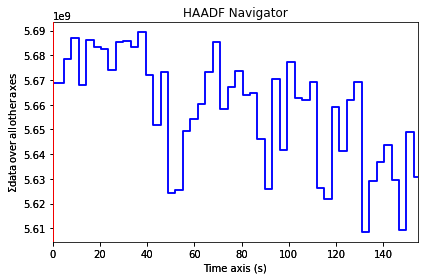

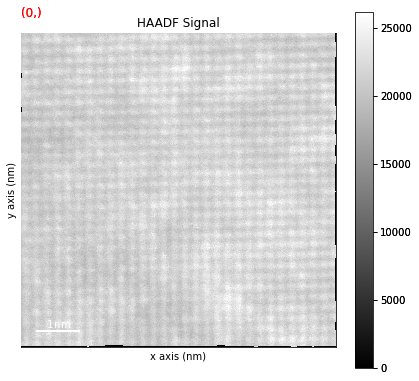

In [13]:
deformed_images.plot()

Because we are mostly interested in the average or median of the image because we are doing registration, we can also call this function directly on the lazy dataset.

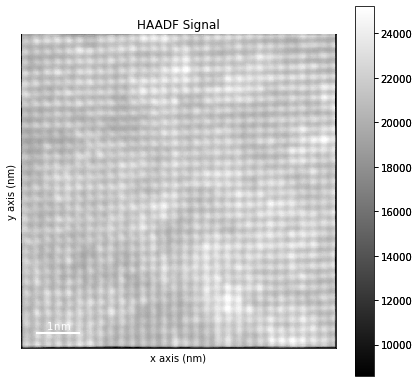

In [16]:
average = deformed_images.mean()
average.plot()

Applying deformations to spectra can take significantly longer, especially if there are a lot of channels as each channel and frame must be looped over. With 4000 channels, the calculation will take 4000 times longer than the calculation for the image stack. Binning the energy axis can cut the calculation time down somewhat.

In [21]:
specmap = data[-1]
specmap

<LazyEDSTEMSpectrum, title: EDS, dimensions: (512, 512, 163|4096)>

In [41]:
rbsm = specmap.rebin(scale=(1, 1, 1, 16))
rbsm

<LazyEDSTEMSpectrum, title: EDS, dimensions: (512, 512, 163|256)>

In [68]:
corrected_spectrum = loaded.apply_deformations_to_spectra(rbsm, sum_frames=True)

In [70]:
corrected_spectrum

<LazyEDSTEMSpectrum, title: EDS, dimensions: (512, 512|256)>

In [71]:
corrected_spectrum.compute()

[########################################] | 100% Completed | 13min 14.1s


In [72]:
corrected_spectrum.save("data/corrected_spectrum.hspy")

# Experimentation

In [65]:
from importlib import reload
reload(matchseries)
reload(io_utils)
reload(config_tools)
from pymatchseries import MatchSeries
loaded = MatchSeries.load("sample_data_HAADF")

In [1]:
import os

In [2]:
import hyperspy.api as hs

/Users/nielscautaerts/opt/anaconda3/envs/devel/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


In [131]:
dss = hs.load("data/sample_data.emd", lazy=True, load_SI_image_stack=True, sum_frames=False)

In [132]:
dss[-1].data.shape

(163, 512, 512, 4096)

In [133]:
dss[-1].data.rechunk(("auto", -1, -1, "auto"))

,Array,Chunk
Bytes,350.04 GB,134.22 MB
Shape,"(163, 512, 512, 4096)","(16, 512, 512, 16)"
Count,75521 Tasks,2816 Chunks
Type,uint16,numpy.ndarray


In [10]:
import dask.array as da
import numpy as np

In [16]:
from subprocess import Popen, PIPE, STDOUT

p = Popen(cmd, stdout=PIPE, stderr=STDOUT)

# This should be safe because we're not piping stdin to the process.
# It gets tricky if we are, because the process can be waiting for input while we're waiting for output.
while True:
    # Wait for some output, read it and print it.
    output = p.stdout.read1(1024).decode('utf-8')
    print(output, end='')
    
    # Has the subprocess finished yet?
    if p.poll() is not None:
        break

if p.returncode != 0:
    print("Exited with error code:", p.returncode)

NameError: name 'cmd' is not defined

In [11]:
import json

In [8]:
testdict = {"b": 3, "c": None}
with open("testfile.json", "w") as f:
    json.dump(testdict, f)
    
with open("testfile.json") as f:
    k = json.load(f)

k

{'b': 3, 'c': None}

In [34]:
from pymatchseries import matchseries
from pymatchseries import io_utils
from pymatchseries import config_tools

In [35]:
from importlib import reload
reload(matchseries)
reload(io_utils)
reload(config_tools)

<module 'pymatchseries.config_tools' from '/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/pymatchseries/config_tools.py'>

In [144]:
data = np.random.randint(0, 255, size=(5, 128, 128))
testm = matchseries.MatchSeries(data, templateSkipNums=[2], path="tester")

In [145]:
testm.run()

/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/pymatchseries/matchseries.py:244: UserWarning: The calculation {self.metadata['path']} already exists!
  warnings.warn("The calculation {self.metadata['path']} already exists!")


Overwrite '/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/tester' (y/n)?
y
Directory output/ already exists
reading reference image from: input/frame_0.tiff
reading template image from: input/frame_0.tiff
Created directory output/stage1/
Using templates images ---------------------------------------
input/frame_1.tiff
input/frame_3.tiff
input/frame_4.tiff
--------------------------------------------------------------
Created directory output/stage1/0/

--------------------------------------------------------
Registration on level 5 started
--------------------------------------------------------

Initial energy:  0.024104733125
 30 steps, tau:    2.e-06, sigma:  1.e-04 energy:  0.019891547937
Descent needed 30 step(s).

--------------------------------------------------------
Registration on level 6 started
--------------------------------------------------------

Initial energy:  0.005678481546
 45 steps, tau:    0     , sigma:  1.e-04 energy: -0.001203276255
De

reading reference image from: output/stage2/median.q2bz
reading template image from: input/frame_0.tiff
Created directory output/stage3/
Using templates images ---------------------------------------
input/frame_0.tiff
input/frame_1.tiff
input/frame_3.tiff
input/frame_4.tiff
--------------------------------------------------------------
Created directory output/stage3/0/

--------------------------------------------------------
Registration on level 5 started
--------------------------------------------------------

Initial energy: -0.454486051283
 42 steps, tau:    0     , sigma:  1.e-04 energy: -0.491714923082
Descent needed 42 step(s).

--------------------------------------------------------
Registration on level 6 started
--------------------------------------------------------

Initial energy: -0.411824569091
 75 steps, tau:    0     , sigma:  1.e-04 energy: -0.476284495353
Descent needed 75 step(s).

--------------------------------------------------------
Registration on level 

In [146]:
#testm.metadata["x_name"]="bla"
testm.metadata

{'x_name': 'x',
 'x_scale': 1,
 'x_offset': 0,
 'x_unit': 'pixels',
 'y_name': 'y',
 'y_scale': 1,
 'y_offset': 0,
 'y_unit': 'pixels',
 'input_type': 'array',
 'lazy': False,
 'metadata_file_path': 'metadata.json',
 'input_folder_path': 'input/',
 'output_folder_path': 'output/',
 'config_file_path': 'config.par',
 'input_data_file': 'data.hdf5',
 'prefix': 'frame',
 'completed': True,
 'x_dim': 128,
 'y_dim': 128,
 'z_dim': 5,
 'digits': 1}

In [13]:
matchseries.MatchSeries.discover(path = ".", recursive=True)

Path      Completed?      # Images  (width, height)
--------  ------------  ----------  -----------------
./tester  True                   4  (128, 128)


In [177]:
testm.configuration._get_frame_list()

[0, 1, 3, 4]

In [179]:
testm.output_folder_path

'/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/tester/output/'

In [116]:
testm.image_data

NameError: name 'testm' is not defined

In [159]:
tload = matchseries.MatchSeries.load("tester")

In [113]:
tload.data.shape

(5, 128, 128)

In [126]:
difim = tload.get_deformed_images()

[########################################] | 100% Completed |  0.1s


<IPython.core.display.Javascript object>


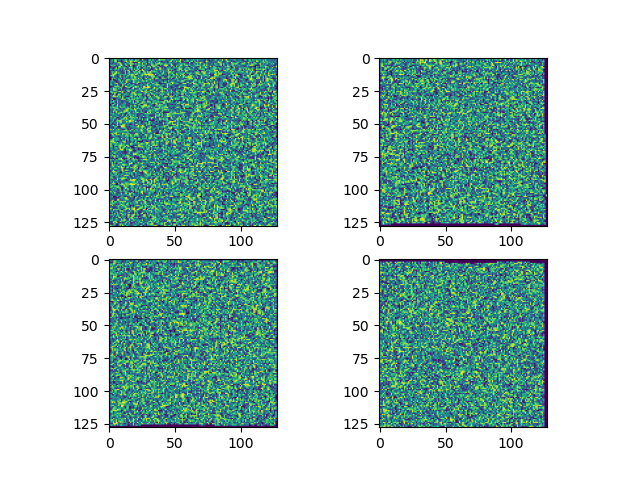

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)
for j, i in enumerate(ax.ravel()):
    i.imshow(difim[j])

In [140]:
difim

array([[[  0.,  26.,  26., ..., 164.,  54., 121.],
        [  0.,  95., 205., ...,  86.,  18., 112.],
        [  0., 119.,  99., ...,  79., 197.,  43.],
        ...,
        [124.,  26.,  52., ..., 168., 142., 112.],
        [ 57.,  33.,  18., ...,  35.,  76., 188.],
        [155., 230., 131., ..., 119., 119.,  88.]],

       [[  0., 208.,  92., ...,  57.,   0.,   0.],
        [  0., 110., 155., ..., 155.,   0.,   0.],
        [  0.,  87., 104., ..., 199.,   0.,   0.],
        ...,
        [  0.,   5., 159., ..., 126., 192.,   0.],
        [  0.,   9., 120., ...,  36., 168.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0., 201., 127., ...,   0.,   0.,   0.],
        [  0., 142.,  28., ..., 138.,  18.,   0.],
        [  0.,  20.,  21., ..., 235., 152.,   0.],
        ...,
        [  0.,  48.,  14., ..., 236.,   0.,   0.],
        [  0., 243., 190., ...,  78.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,

<IPython.core.display.Javascript object>


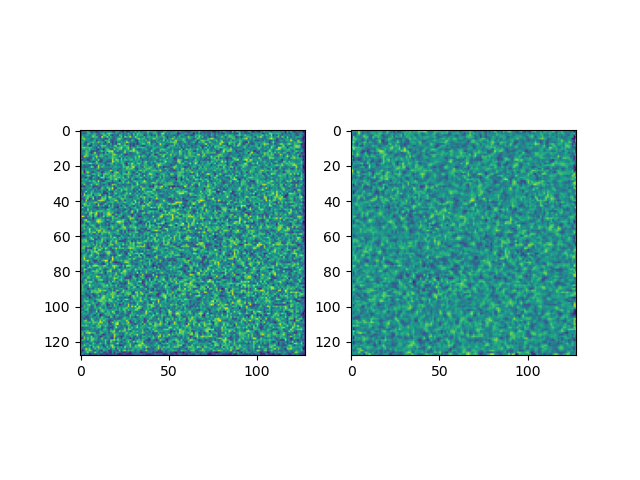

In [143]:
fig, (ax, ax2) = plt.subplots(1,2)
ax.imshow(difim.mean(axis=0))
from PIL import Image
data1 = np.array(Image.open("/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/tester/output/stage3/average.png"))
ax2.imshow(data1)

In [164]:
from importlib import reload
reload(matchseries)
reload(io_utils)
reload(config_tools)

<module 'pymatchseries.config_tools' from '/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/pymatchseries/config_tools.py'>

In [167]:
specmap = np.ones((8, 128, 128, 4000))
tload = matchseries.MatchSeries.load("tester")

In [168]:
result = tload.apply_deformations_to_spectra(specmap, sum_frames=False)

((4,), (128,), (128,))
((4,), (128,), (128,))
((4,), (128,), (128,), (125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125))
(0, 0, 0, 0)
(0, 0, 0)
(0, 0, 0)
[                                        ] | 0% Completed |  0.0s(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
[#########                               ] | 23% Completed |  0.1s(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
[###########                             ] | 28% Completed |  2.9s(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
[###########                             ] | 29% Completed |  3.1s(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
[#############                           ] | 32% Completed |  3.2s(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
(4, 128, 128, 125)
(4, 128, 128)
(4, 128, 128)
[##############                

In [169]:
result.shape

(4, 128, 128, 4000)

In [105]:
from scipy import ndimage

def deform_image(image, defX, defY):
    h, w = image.shape[-2:]
    coords = \
        np.mgrid[0:h, 0:w] + np.multiply([defY[0], defX[0]], (np.max([h, w])-1))
    defimage = ndimage.map_coordinates(image[0], coords, order=0,
                                   mode="constant")
    return defimage[np.newaxis, ...]
    

In [137]:
kk = da.from_array(np.zeros((500, 500, 500)), chunks=(-1, -1, "auto"))

In [138]:
kk

dask.array<array, shape=(500, 500, 500), dtype=float64, chunksize=(500, 500, 50), chunktype=numpy.ndarray>

In [93]:
defx, defy = tload._MatchSeries__load_deformations_data_lazy()

In [106]:
ans = difim.map_blocks(deform_image, defx, defy, dtype=float)
ans

dask.array<deform_image, shape=(4, 128, 128), dtype=float64, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

In [107]:
ans.compute()

array([[[  0,  26,  26, ..., 164,  54, 121],
        [  0,  95, 205, ...,  86,  18, 112],
        [  0, 119,  99, ...,  79, 197,  43],
        ...,
        [124,  26,  52, ..., 168, 142, 112],
        [ 57,  33,  18, ...,  35,  76, 188],
        [155, 230, 131, ..., 119, 119,  88]],

       [[  0, 208,  92, ...,  57,   0,   0],
        [  0, 110, 155, ..., 155,   0,   0],
        [  0,  87, 104, ..., 199,   0,   0],
        ...,
        [  0,   5, 159, ..., 126, 192,   0],
        [  0,   9, 120, ...,  36, 168,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0, 201, 127, ...,   0,   0,   0],
        [  0, 142,  28, ..., 138,  18,   0],
        [  0,  20,  21, ..., 235, 152,   0],
        ...,
        [  0,  48,  14, ..., 236,   0,   0],
        [  0, 243, 190, ...,  78,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [204, 123,  29, ...,   0,   0,   0],
        ..

In [82]:
dir(tload)

['_MatchSeries__data',
 '_MatchSeries__get_default_axlist',
 '_MatchSeries__is_existing_frame',
 '_MatchSeries__is_valid_data',
 '_MatchSeries__load_calculation',
 '_MatchSeries__load_data',
 '_MatchSeries__load_deformation',
 '_MatchSeries__load_deformations_data_lazy',
 '_MatchSeries__metadata',
 '_MatchSeries__prepare_calculation',
 '_MatchSeries__run_match_series',
 '_MatchSeries__setup_new_calculation',
 '_MatchSeries__update_metadata_file',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply_deformations_to_spectra_tm',
 'apply_deformations_to_spectra',
 'completed',
 'config_file_path',
 'configuration',
 'data',
 'discover',
 'get_deformed_images',
 'image_

In [37]:
deformations = tload.import_deformations(lazy=True)

[{'name': 'frames', 'size': 4, 'navigate': True}, {'name': 'y', 'size': 128, 'units': 'pixels', 'scale': 1, 'offset': 0, 'navigate': False}, {'name': 'x', 'size': 128, 'units': 'pixels', 'scale': 1, 'offset': 0, 'navigate': False}]


In [20]:
%matplotlib notebook

In [39]:
deformations.data

dask.array<add, shape=(4, 128, 128), dtype=complex128, chunksize=(1, 128, 128), chunktype=numpy.ndarray>

In [58]:
dfim = tload.get_deformed_images()

KeyError: '_MatchSeries__get_frame_list'

In [43]:
from dask.diagnostics import ProgressBar

In [46]:
from dask import delayed
from pymatchseries import io_utils as ioutls

class poo:
    
    @delayed
    def load_deformations(self, frame):
        defX = ioutls._loadFromQ2bz(f"/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/tester/output/stage3/{frame}-r/deformation_07_0.dat.bz2")
        defY = ioutls._loadFromQ2bz(f"/Users/nielscautaerts/Documents/PythonProjects/pyMatchSeries/examples/tester/output/stage3/{frame}-r/deformation_07_1.dat.bz2")
        return defX, defY
    

In [47]:
p = poo()
defs = p.load_deformations(1)

In [184]:
defs.compute()[1].shape

(128, 128)

In [48]:
comp = da.from_delayed(defs[0]+1j*defs[1], (128, 128), dtype=complex)

In [49]:
comp

dask.array<from-value, shape=(128, 128), dtype=complex128, chunksize=(128, 128), chunktype=numpy.ndarray>

In [53]:
te = hs.signals.ComplexSignal2D(comp).as_lazy()
te.data

dask.array<from-value, shape=(128, 128), dtype=complex128, chunksize=(128, 128), chunktype=numpy.ndarray>

In [54]:
te.compute(parallel=True)

[########################################] | 100% Completed |  0.1s


In [198]:
te.data

array([[-0.00282311+0.00640702j, -0.00270945+0.00634468j,
        -0.00268654+0.00613124j, ...,  0.00930376+0.00492699j,
         0.00881795+0.00524075j,  0.00921436+0.00521263j],
       [-0.00299113+0.00635549j, -0.00297607+0.00632481j,
        -0.00279879+0.00613094j, ...,  0.00964022+0.00490899j,
         0.00942276+0.00528282j,  0.00950706+0.0051322j ],
       [-0.00320373+0.00634935j, -0.00323827+0.00638092j,
        -0.00307188+0.00613522j, ...,  0.01015324+0.00472808j,
         0.01008986+0.00485202j,  0.01003204+0.00490896j],
       ...,
       [-0.00483492+0.00369416j, -0.00487284+0.00370278j,
        -0.00482685+0.00387431j, ...,  0.00396889+0.00496112j,
         0.00418619+0.0049551j ,  0.00410274+0.00503211j],
       [-0.00455515+0.00351217j, -0.0044292 +0.00333941j,
        -0.00426538+0.00307143j, ...,  0.00436069+0.00500041j,
         0.00407447+0.00508952j,  0.00407891+0.00503891j],
       [-0.00447419+0.00340724j, -0.00438068+0.00326354j,
        -0.00422728+0.00314756